In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import itertools

In [3]:
avgs_df = pd.read_csv(os.path.join("data","lebron_james_avg_stats.csv"))
avgs_df.head()

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2003-04,19.0,CLE,NBA,SG,79.0,79.0,39.5,7.9,18.9,...,0.754,1.3,4.2,5.5,5.9,1.6,0.7,3.5,1.9,20.9
1,2004-05,20.0,CLE,NBA,SF,80.0,80.0,42.4,9.9,21.1,...,0.750,1.4,6.0,7.4,7.2,2.2,0.7,3.3,1.8,27.2
2,2005-06,21.0,CLE,NBA,SF,79.0,79.0,42.5,11.1,23.1,...,0.738,0.9,6.1,7.0,6.6,1.6,0.8,3.3,2.3,31.4
3,2006-07,22.0,CLE,NBA,SF,78.0,78.0,40.9,9.9,20.8,...,0.698,1.1,5.7,6.7,6.0,1.6,0.7,3.2,2.2,27.3
4,2007-08,23.0,CLE,NBA,SF,75.0,74.0,40.4,10.6,21.9,...,0.712,1.8,6.1,7.9,7.2,1.8,1.1,3.4,2.2,30.0


In [4]:
print(avgs_df.columns)

Index(['Season', 'Age', 'Tm', 'Lg', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')


In [5]:
def age_cat(age):
    if age < 27:
        return "young"
    elif age < 34:
        return "middle-aged"
    return "older"

In [6]:
avgs_df["Age Category"] = avgs_df["Age"].apply(lambda x: age_cat(x))

<h2>Overall Offensive Analysis</h2>
<h3>Basic Offensive Statistics</h3>
<ul>
    <li>TRB</li>
    <li>AST</li>
    <li>PTS</li>
    <li>Age Category</li>
</ul>

In [7]:
imprt_cols = ["TRB","AST","PTS","FG%","Age Category"]
imprt_cols

['TRB', 'AST', 'PTS', 'FG%', 'Age Category']

In [8]:
imprt_df = avgs_df[imprt_cols]

<Figure size 1440x1440 with 0 Axes>

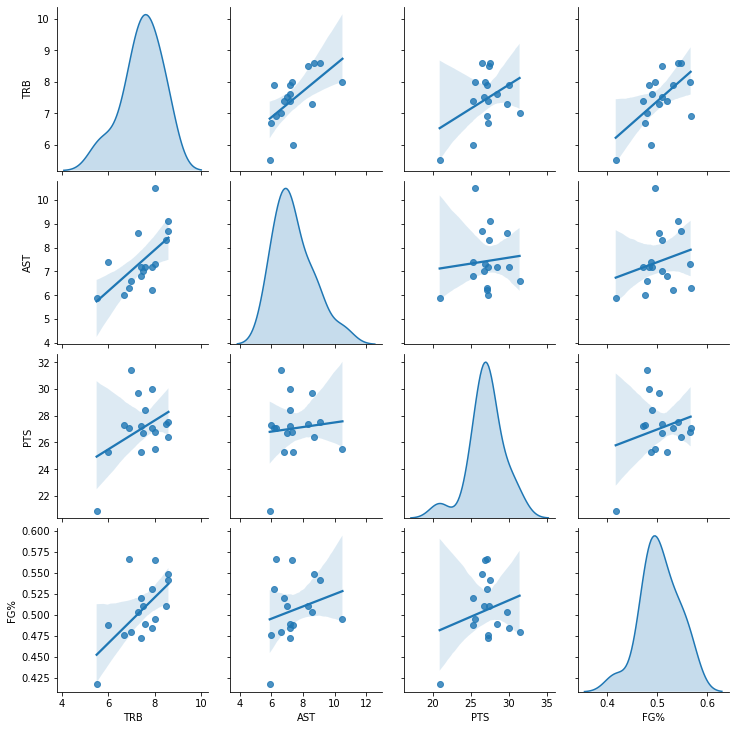

In [9]:
fig = plt.figure(1,(20,20))
sns.pairplot(imprt_df,diag_kind="kde",kind="reg")

<h4>Insights</h4>
<ul>
    <li>Amongst all the basic statistics, Lebron James has a positive correlation with all other statistics</li>
    <li>Overall, FG% has a rather normal distribution</li>
    <li>Assists has a slightly left-skew and Total Rebounds has a slight right-skew</li>
    <li>Points is bi-modal with a peak at about 28 points per game</li>
</ul>

<h4>Because the pairplot has positive correlations amongst all the basic numerical statistics, we can examine how these patterns change by age category.</h4>

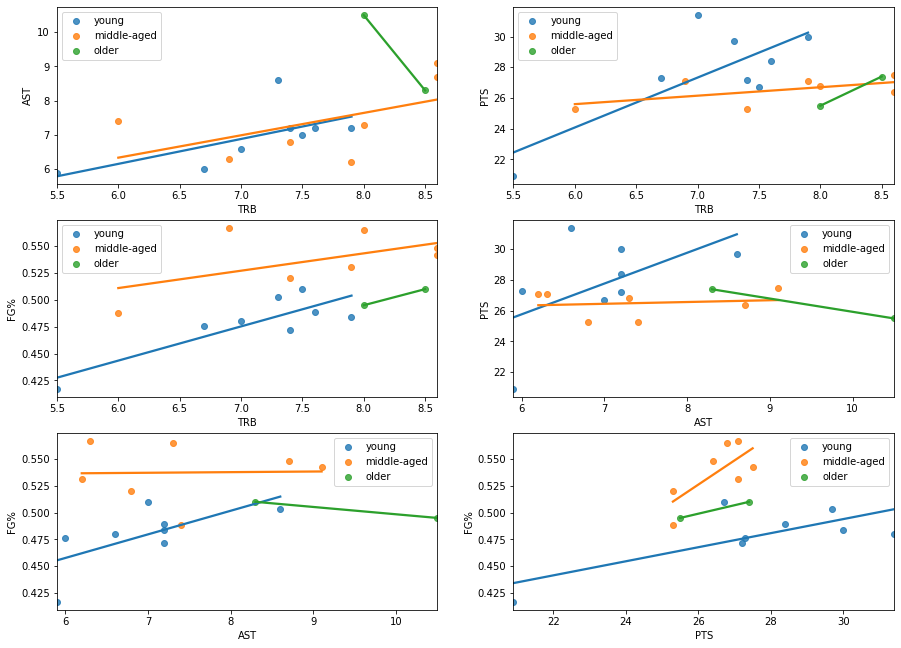

In [10]:
plt.figure(1,(15,15))
imprt_cols.remove("Age Category")
basic_num_combos = itertools.combinations(imprt_cols,2)
basic_num_combos = [basic_num_combo for basic_num_combo in basic_num_combos]
basic_num_combos_len = len(basic_num_combos)
i = 0
for basic_num_combo in basic_num_combos:
    i += 1
    ax = plt.subplot(1+(basic_num_combos_len//2),2,i)
    for age_cat in avgs_df["Age Category"].unique():
        data = avgs_df[avgs_df["Age Category"] == age_cat]
        sns.regplot(x=basic_num_combo[0],y=basic_num_combo[1],data=data,ci=None,label=age_cat)
    ax.legend()
imprt_cols.append('Age Category')
plt.show()

<h4>Insights</h4>
<ul>
    <li>In the elder stages of his career, 3 out of the 6 statistics have a negative correlation, implying Lebron James may be specializing in certain skillsets</li>
    <li>In his the young and middle stages of his career, all the basic statistics have a positive correlation</li>
    <li>Lebron increased his average number of assists while maintaining his field goal percentage</li>
    <li>At every stage of his career, an increase in James' points per game is also complemented with an increase in field goal percentage</li>
</ul>
<i>*Note: Keep in mind that the elder age category only contain data for 3 years whereas the other 2 categories have data for at least 6 years.</i>

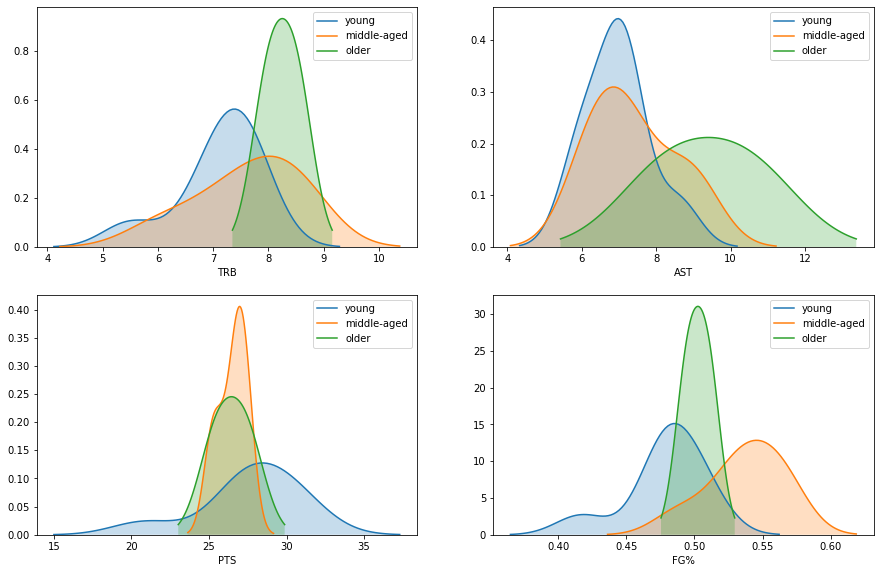

In [11]:
fig = plt.figure(1,(15,15))
i = 0
for imprt_col in imprt_cols:
    if imprt_col == "Age Category":
        continue
    i+=1
    ax = plt.subplot(1+(len(imprt_cols)//2),2,i)
    for age_cat in avgs_df["Age Category"].unique():
        data = avgs_df[avgs_df["Age Category"]==age_cat][imprt_col]
        sns.kdeplot(data,shade=True,label=age_cat)
    ax.set_xlabel(imprt_col)
plt.show()

In [12]:
def get_outlier_index(df,col):
    data = df[col].values
    q1 = np.percentile(data,25)
    q3 = np.percentile(data,75)
    
    iqr = q3 - q1
    
    min_range = q1-(1.5*iqr)
    max_range = q3+(1.5*iqr)
    
    outliers = df[(df[col]<min_range) | (df[col]>max_range)]
    return outliers.index

In [13]:
imprt_cols.remove("Age Category")
for imprt_col in imprt_cols:
    outliers_indices = get_outlier_index(avgs_df,imprt_col)
    outliers_data = avgs_df.iloc[outliers_indices]
    print(f"{imprt_col} has {len(outliers_data)} outliers")
imprt_cols.append("Age Category")

TRB has 0 outliers
AST has 0 outliers
PTS has 4 outliers
FG% has 0 outliers


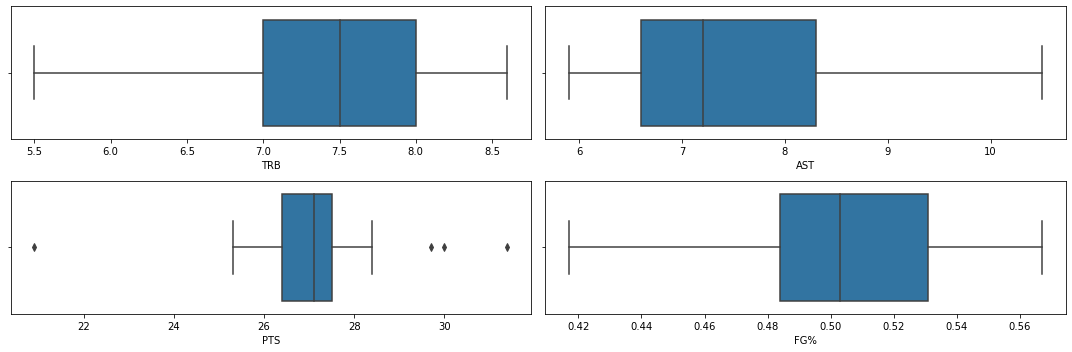

In [14]:
fig = plt.figure(1,(15,5))
i = 0
for imprt_col in imprt_cols:
    if imprt_col == "Age Category":
        continue
    i += 1
    ax = plt.subplot(2,2,i)
    ax.set_xlabel(imprt_col)
    sns.boxplot(x=imprt_col, data=avgs_df)
    plt.tight_layout()
plt.show()

<h4>Insights</h4>
<ul>
    <li>Lebron James' scoring statistics peaked at his younger and middle-aged stages of his career</li>
    <li>In the younger and middle stages of his career, his assists averaged about 6.5-7 assists per games, whereas in the older stages in his career, this increased to about 9 assists per game.</li>
    <li>This implies his focus slightly shifted from scoring to passing as his career passed.</li>
    <li>His total rebounds also increased as he aged, increasing from about 7-8 rebounds per game to about 8.5 rebounds per game</li>
    <li>Points per game contains 4 outliers, while the other basic statistics do not have any.</li>
</ul> 

<h2>In-depth Offensive and Scoring Efficiency Analysis</h2>

In [15]:
def corr_cats(orig_corr_df):
    corr_df = orig_corr_df.copy(deep=True)
    for row in range(len(corr_df)):
        for col in range(len(corr_df.iloc[0])):
            val = corr_df.iloc[row,col]
            neg = val < 0
            val = abs(val)
            new_val = 0
            if val < 0.1:
                pass
            elif val < 0.3:
                val = 0.3
            elif val < 0.5:
                new_val = 0.5
            elif val < 0.7:
                new_val = 0.7
            else:
                new_val = 1
            if neg:
                new_val *= -1
            corr_df.iloc[row,col] = new_val
    return corr_df

def filter_high_corr(orig_corr_df, corr_cutoff):
    corr_df = orig_corr_df.copy(deep=True)
    for row in range(len(corr_df)):
        for col in range(len(corr_df.iloc[0])):
            if corr_df.iloc[row,col] >= corr_cutoff:
                corr_df.iloc[row,col] = 1
            elif corr_df.iloc[row,col] <= -corr_cutoff:
                corr_df.iloc[row,col] = -1
            else:
                corr_df.iloc[row,col] = 0
    return corr_df

c:\users\kambo\.virtualenvs\lebronjames-q3tyihsg\lib\site-packages\pandas\core\frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


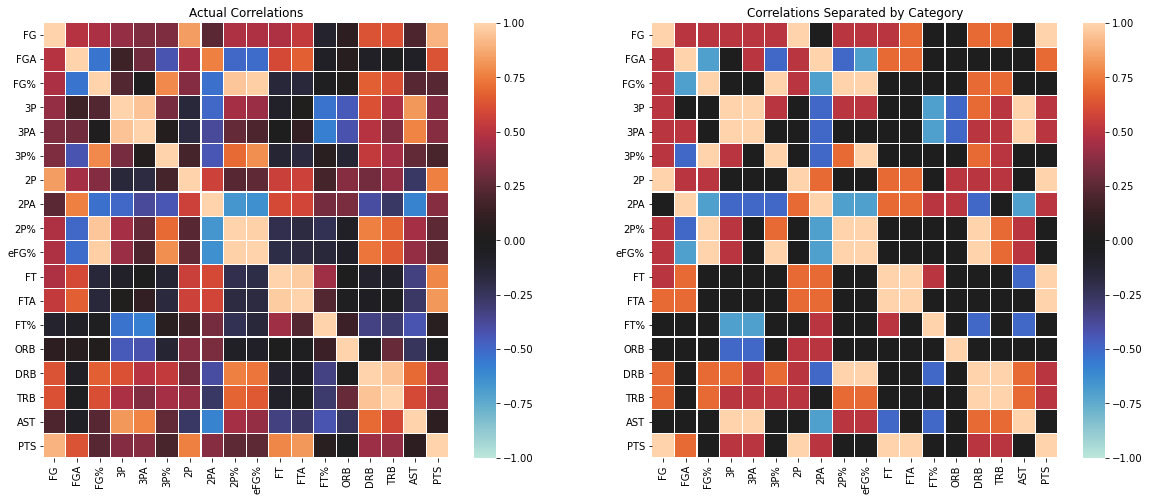

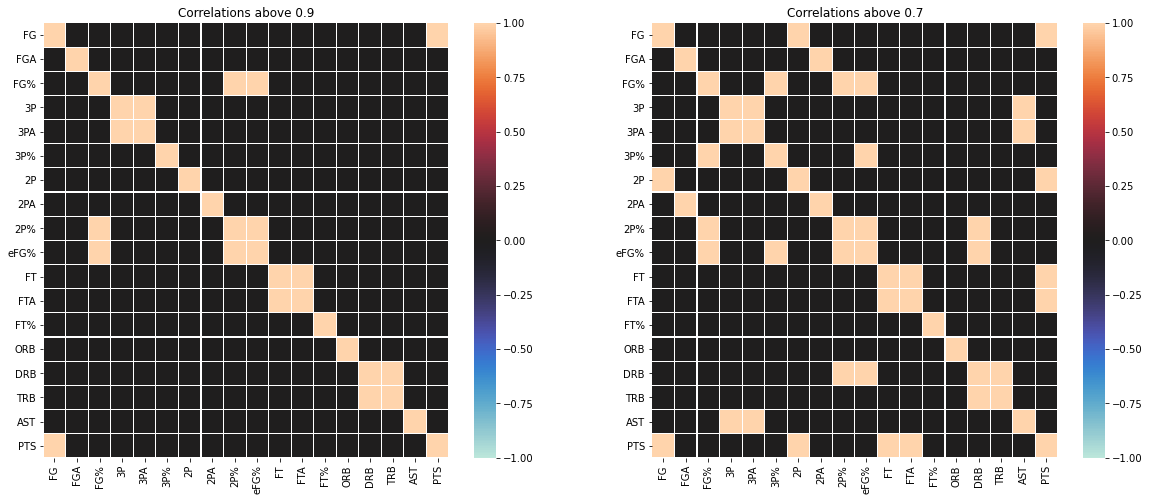

In [16]:
num_df = avgs_df.select_dtypes(exclude=["object"])
num_df.drop(["Age","G","GS","MP", "PF","TOV","BLK","STL"],axis=1,inplace=True)

corrs = num_df.corr()
fig = plt.figure(1,(20,8))
ax = plt.subplot(1,2,1)
ax.set_title("Actual Correlations")
sns.heatmap(corrs,vmin=-1,vmax=1, center=0, linewidth=0.1)

ax = plt.subplot(1,2,2)
ax.set_title("Correlations Separated by Category")
nums_corrs_cats_df = corr_cats(corrs)
sns.heatmap(nums_corrs_cats_df,vmin=-1,vmax=1, center=0, linewidth=0.1)
plt.show()

fig = plt.figure(1,(20,8))
ax = plt.subplot(1,2,1)
corr_cutoff = 0.9
ax.set_title(f"Correlations above {corr_cutoff}")
high_corr_df = filter_high_corr(corrs, corr_cutoff)
sns.heatmap(high_corr_df,vmin=-1,vmax=1, center = 0, linewidth=0.1)

ax = plt.subplot(1,2,2)
corr_cutoff = 0.7
ax.set_title(f"Correlations above {corr_cutoff}")
high_corr_df = filter_high_corr(corrs, corr_cutoff)
sns.heatmap(high_corr_df,vmin=-1,vmax=1, center = 0, linewidth=0.1)


plt.show()

<h4>Insights</h4>
<ul>
    <li>Field goals amde and PTS per game have an extremely high correlation</li>
    <li>FG%, 2P%, and eFG% all have above a 90% correlation with each other</li>
    <li>Three pointers made and three pointers attempted also have above a 90% correlation, this likely implies Lebron's ratio of made 3s to missed 3s remains relatively constant</li>
    <li>There is a strong correlation between total rebounds and defensive rebounds, implying Lebron gets most of rebounds defensively</li>
    <li>Overall, we can see there is not too many features that have significant correlations with others, which is ideal for machine learning</li>
    <li>Almost all the scoring percentages, besides free throw percentage, have more than 70% correlation</li>
</ul>
<i>*Note: The cutoffs in these situations are 0.7 and 0.9 since this is a high enough correlation to drop a feature without losing significant insights.</i>

<h3>Percentage Features</h3>
<ul>
    <li>FG%</li>
    <li>eFG%</li>
    <li>3P%</li>
    <li>2P%</li>
    <li>FT%</li>
</ul>

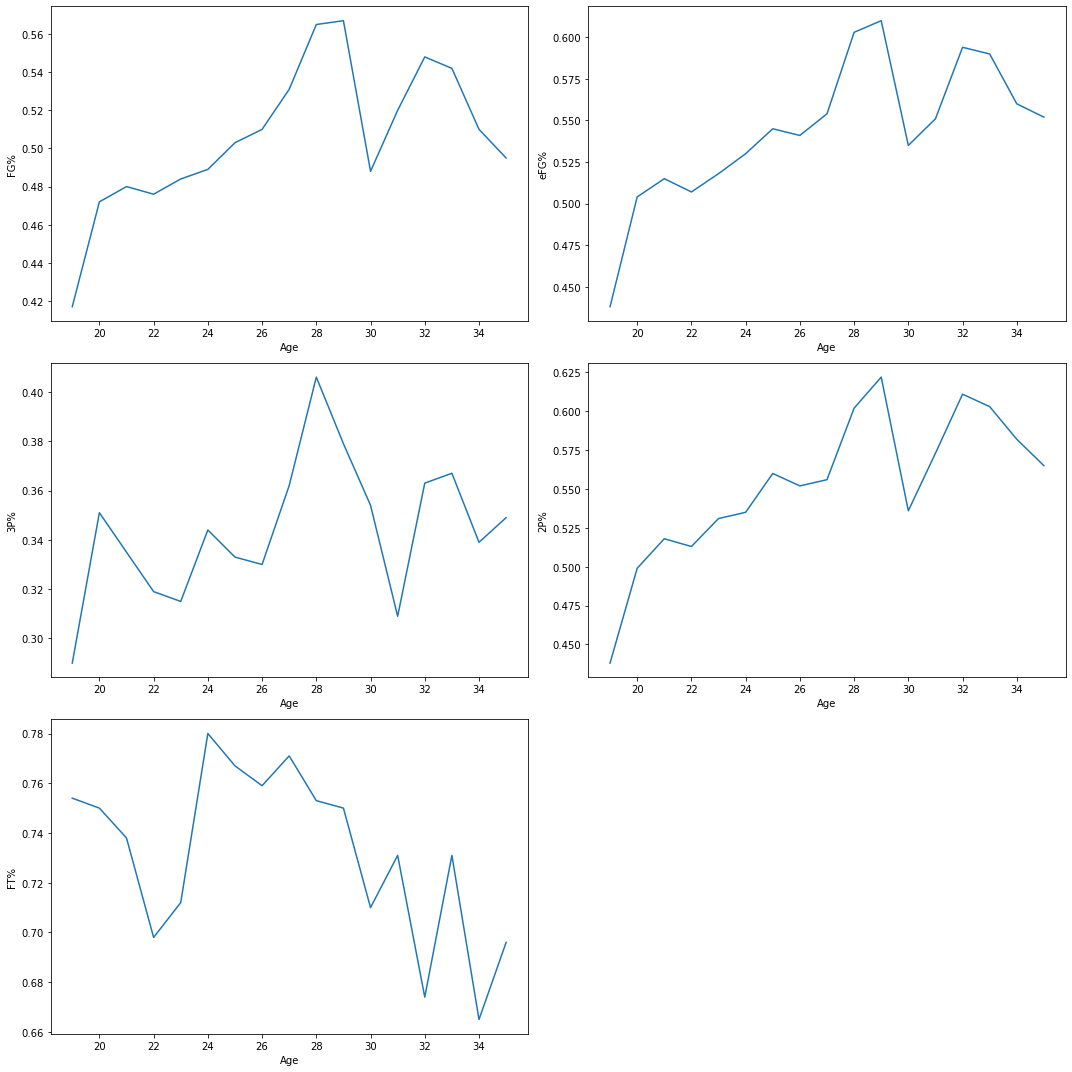

In [17]:
percentage_cols = ["FG%","eFG%","3P%","2P%","FT%"]
fig = plt.figure(1,(15,15))
i = 0
for col in percentage_cols:
    i += 1
    ax = plt.subplot(3,2,i)
    sns.lineplot(x="Age",y=col,data=avgs_df)
#     ax.legend(False)
    plt.tight_layout()
plt.show()

<h4>Insights</h4>
<ul>
    <li>As seen in the correlation heatmaps, 3P%, 2P%, eFG%, and FG% all have a very similar pattern</li>
    <li>After an increase in FT% in the beginning of Lebron's career, his FT% has been on an overall decrease as he has aged</li>
    <li>His 3P% seems to be more erradic as at one point, in a span of 3 years from 28 to 31, it dropped almost 10%</li>
    <li>His eFG% is consistently higher than their FG%, showing he always attempts very efficient shots</li>
</ul>

In [18]:
for col in percentage_cols:
    outliers = get_outlier_index(avgs_df,col)
    print(f"{col} has {len(outliers)} outliers")

FG% has 0 outliers
eFG% has 1 outliers
3P% has 0 outliers
2P% has 1 outliers
FT% has 0 outliers


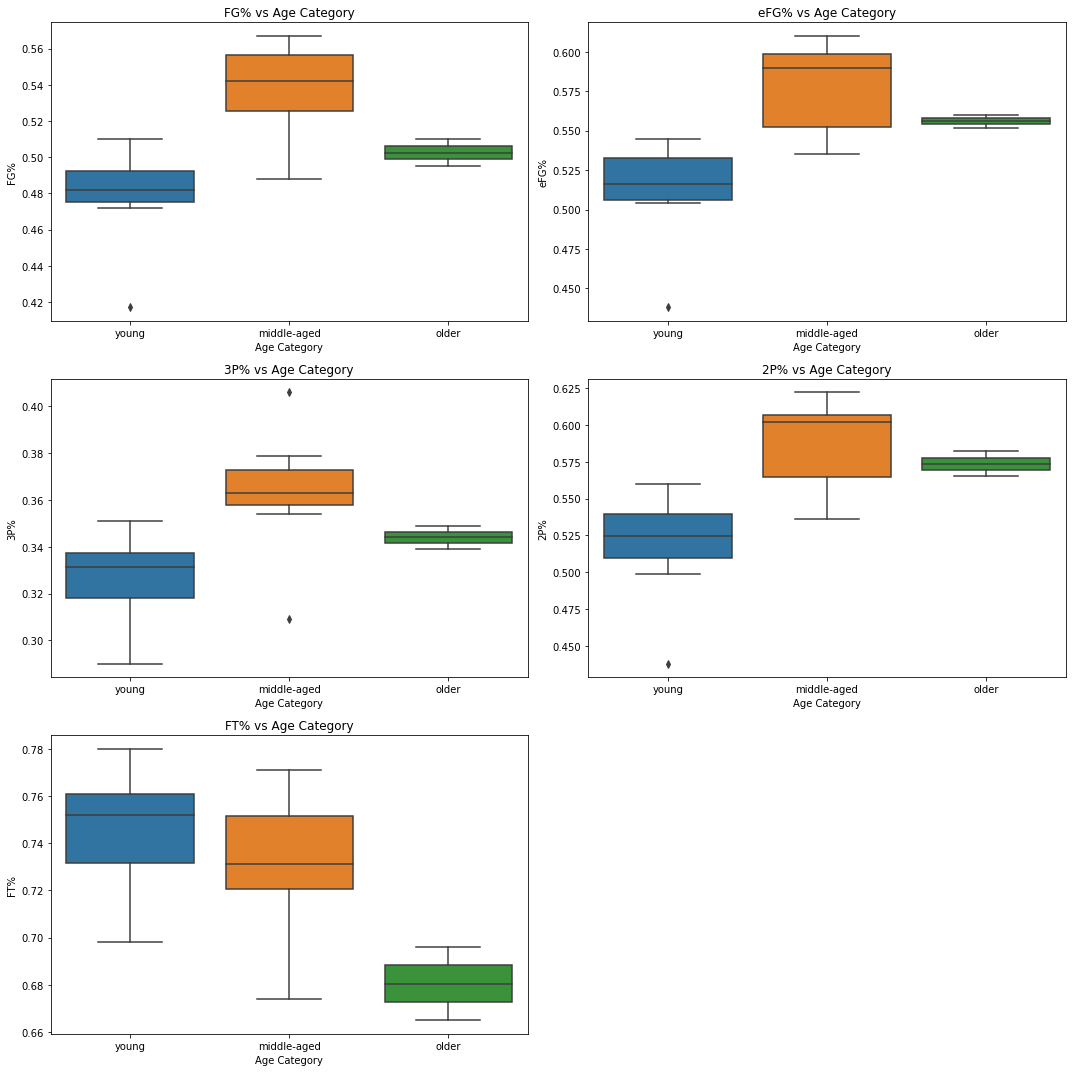

In [19]:
fig = plt.figure(1,(15,15))
i = 0
for col in percentage_cols:
    i += 1
    ax = plt.subplot(3,2,i)
    ax.set_xlabel(col)
    ax.set_title(f"{col} vs Age Category")
    sns.boxplot(x="Age Category",y=col,data=avgs_df)
    plt.tight_layout()
plt.show()

<h4>Insights</h4>
<ul>
    <li>The percentage columns have a maximum of 1 outlier, while some of these statistics have 0 outliers</li>
    <li>This implies Lebron has had a very consistent statistics over his career</li>
    <li>His offensive efficiency statistics mostly peak in the middle-part of his career except for his FT%, which has been on a decline throughout his career</li>
    <li>The spike in the middle of his career is likely a combination of the athleticism and his experience</li>
    <li>Besides FT%, Lebron's percentages are higher in the older section of his career than the younger part of his career, displaying how his experience has played a factor in improving his scoring efficiency</li>
</ul>

In [20]:
def age_cat_to_size(cat):
    if cat == "young":
        return 10
    elif cat == "middle-aged":
        return 20
    return 30
def age_cat_to_color(cat):
    if cat == "young":
        return "r"
    elif cat == "middle-aged":
        return "g"
    return "b"

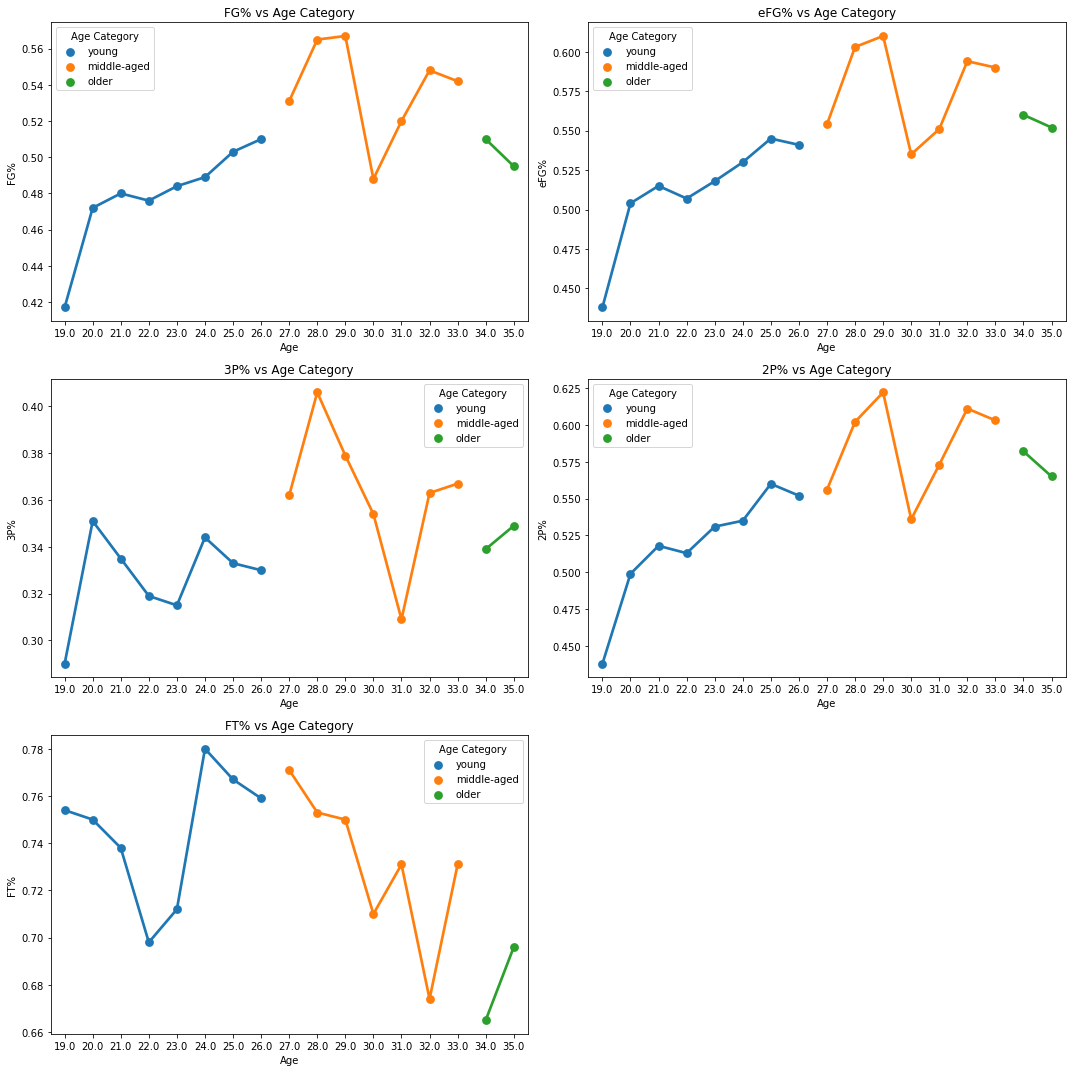

In [21]:
avgs_df["Age Size"] = avgs_df["Age Category"].apply(lambda x: age_cat_to_size(x))
avgs_df["Age Color"] = avgs_df["Age Category"].apply(lambda x: age_cat_to_color(x))
fig = plt.figure(1,(15,15))
i = 0
min_age = avgs_df["Age"].min()
max_age = avgs_df["Age"].max()
xtick_labels = [x for x in range(int(min_age),int(max_age)+1)]
xticks = [i+1 for i, val in enumerate(xtick_labels)]
for col in percentage_cols:
    i += 1
    ax = plt.subplot(3,2,i)
    ax.set_xlabel(col)
    ax.set_title(f"{col} vs Age Category")
    s = 0
    sns.pointplot(x="Age",y=col,hue="Age Category",s=100,data=avgs_df)
    plt.tight_layout()
plt.show()
avgs_df.drop("Age Size", axis=1,inplace=True)
avgs_df.drop("Age Color", axis=1,inplace=True)

In [64]:
for percentage_col in percentage_cols:
    for age_cat in avgs_df["Age Category"].unique():
        if age_cat == "older":
            continue
        data = avgs_df[avgs_df["Age Category"]==age_cat]
        corr_coef = np.corrcoef(data[percentage_col], data["Age"])[0,1]
        print(f"The correlation coefficient for {percentage_col} during the {age_cat} part of Lebron's career is {round(corr_coef,2)}")
    print("\n")
        

The correlation coefficient for FG% during the young part of Lebron's career is 0.87
The correlation coefficient for FG% during the middle-aged part of Lebron's career is -0.13


The correlation coefficient for eFG% during the young part of Lebron's career is 0.85
The correlation coefficient for eFG% during the middle-aged part of Lebron's career is 0.08


The correlation coefficient for 3P% during the young part of Lebron's career is 0.33
The correlation coefficient for 3P% during the middle-aged part of Lebron's career is -0.37


The correlation coefficient for 2P% during the young part of Lebron's career is 0.9
The correlation coefficient for 2P% during the middle-aged part of Lebron's career is 0.27


The correlation coefficient for FT% during the young part of Lebron's career is 0.27
The correlation coefficient for FT% during the middle-aged part of Lebron's career is -0.72




In [23]:
avgs_df.head()

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Age Category
0,2003-04,19.0,CLE,NBA,SG,79.0,79.0,39.5,7.9,18.9,...,1.3,4.2,5.5,5.9,1.6,0.7,3.5,1.9,20.9,young
1,2004-05,20.0,CLE,NBA,SF,80.0,80.0,42.4,9.9,21.1,...,1.4,6.0,7.4,7.2,2.2,0.7,3.3,1.8,27.2,young
2,2005-06,21.0,CLE,NBA,SF,79.0,79.0,42.5,11.1,23.1,...,0.9,6.1,7.0,6.6,1.6,0.8,3.3,2.3,31.4,young
3,2006-07,22.0,CLE,NBA,SF,78.0,78.0,40.9,9.9,20.8,...,1.1,5.7,6.7,6.0,1.6,0.7,3.2,2.2,27.3,young
4,2007-08,23.0,CLE,NBA,SF,75.0,74.0,40.4,10.6,21.9,...,1.8,6.1,7.9,7.2,1.8,1.1,3.4,2.2,30.0,young


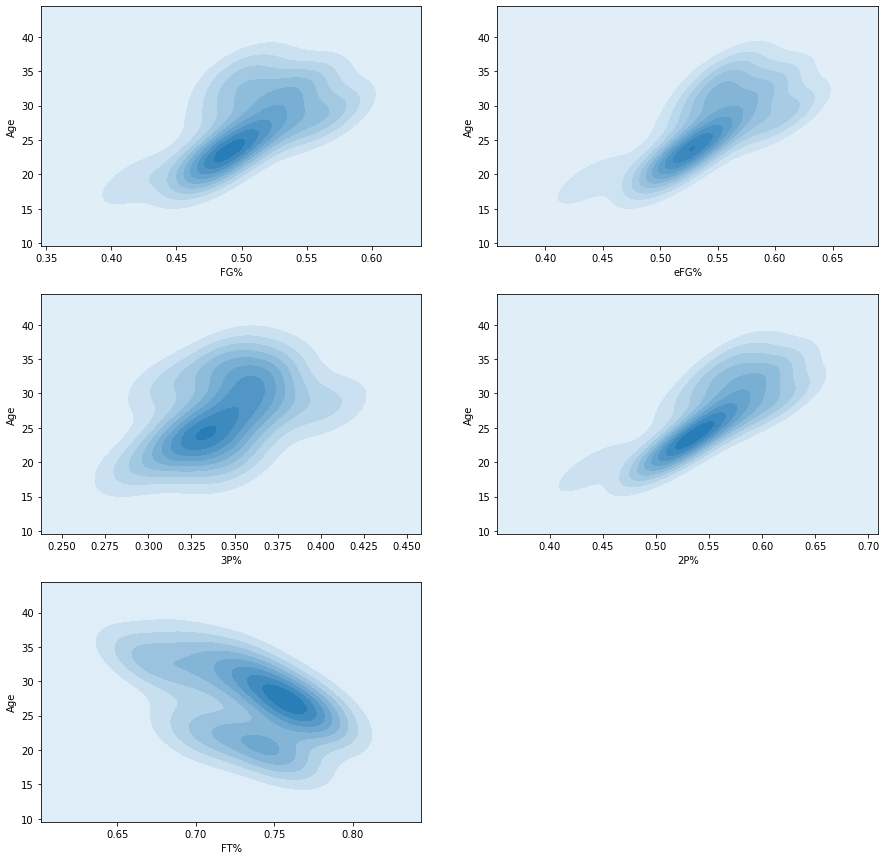

In [24]:
fig = plt.figure(1,(15,15))
i = 0
for perc_col in percentage_cols:
    i += 1
    ax = plt.subplot(3,2,i)
    sns.kdeplot(data=avgs_df[perc_col],data2=avgs_df["Age"],shade=True)

<h4>Insights</h4>
<ul>
    <li>Lebron's FG%, eFG%, 2P%, and 3P% were on a consistent increase during the younger part of his career</li>
    <li>However, the middle part of his career seems more random as the strongest correlation besides FT% is -0.37.</li>
    <li>Moreover, his FT% was on a constant decline throughout the middle part of his career although it was in on an increase in the younger part of his career</li>
    <li>Besides 3P%, Lebron's percentage statistics consistently show a negative quadratic relationship</li>
</ul>
<i>**Note: The correlations for the older part of Lebron's career is always 1 or -1 because there are only 2 data points</i>

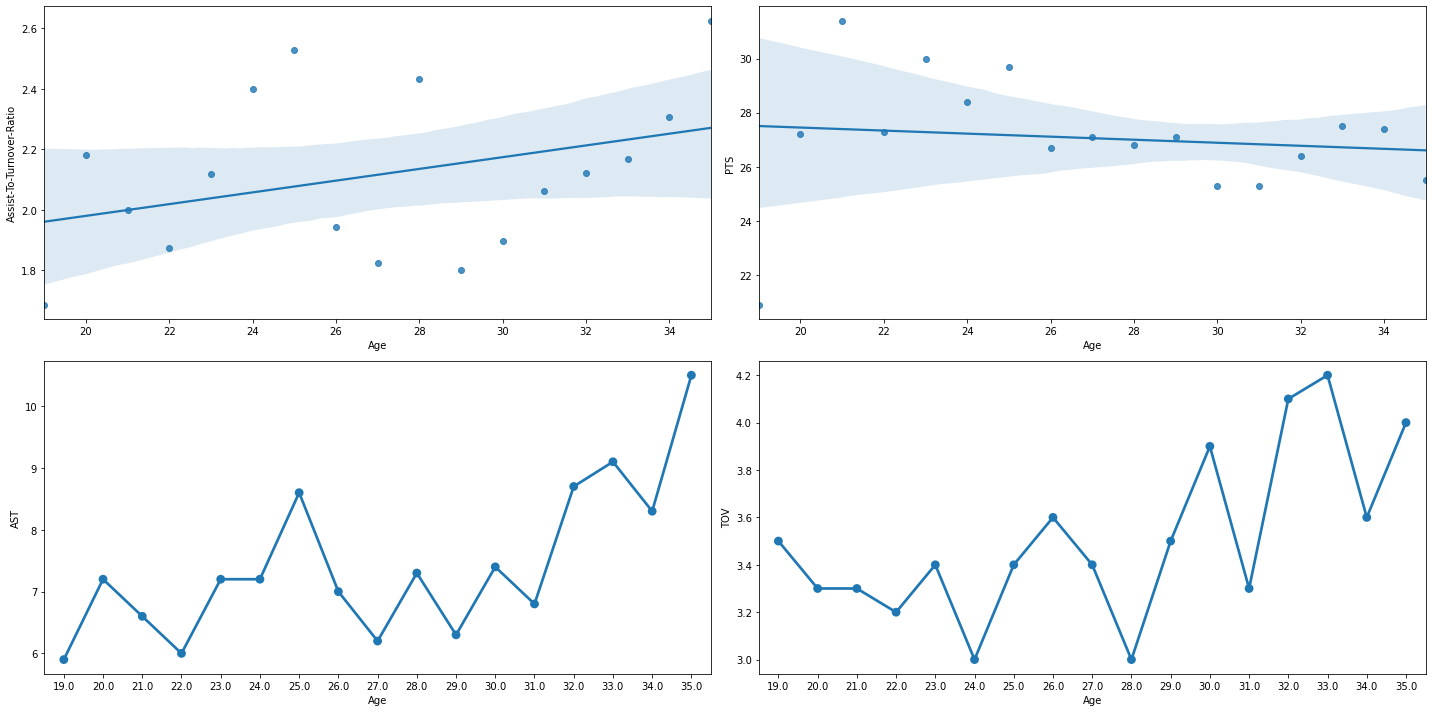

In [25]:
avgs_df["Assist-To-Turnover-Ratio"] = avgs_df["AST"] / avgs_df["TOV"]
plt.figure(1,(20,10))

ax = plt.subplot(2,2,1)
sns.regplot("Age", "Assist-To-Turnover-Ratio",data=avgs_df)

ax = plt.subplot(2,2,2)
sns.regplot("Age", "PTS",data=avgs_df)

ax = plt.subplot(2,2,3)
sns.pointplot("Age","AST",data=avgs_df)

ax = plt.subplot(2,2,4)
sns.pointplot("Age","TOV",data=avgs_df)

plt.tight_layout()
plt.show()

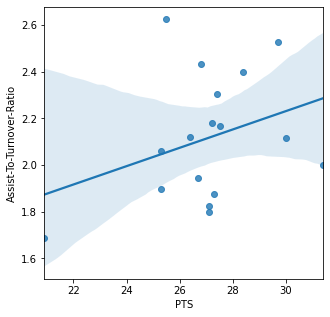

In [26]:
plt.figure(1,(5,5))
sns.regplot("PTS","Assist-To-Turnover-Ratio",data=avgs_df)
plt.show()

In [66]:
corr_atr = np.corrcoef(avgs_df["PTS"],avgs_df["Assist-To-Turnover-Ratio"])[0,1]
print(f"The correlation of points per game and the assist to turnover ratio is {round(corr_atr,2)}")

The correlation of points per game and the assist to turnover ratio is 0.33


<h4>Insights</h4>
<ul>
    <li>Lebron's assist-to-turnover ratio has been increasing as he aged</li>
    <li>This steady increase demonstrates how he has become more efficient at passing and getting his teammates involved</li>
    <li>It is important to note the correlation between points per game and assist-to-turnover ratio is 0.33, indicating a weak relationship</li>
    <li>Moreover, his increase in assist-to-turnover ratio is complemented by a decreasing in points per game</li>
</ul>

<h3>Rebound Features</h3>
<ul>
    <li>TRB</li>
    <li>ORB</li>
    <li>DRB</li>
</ul>

In [28]:
rebound_cols = ['TRB', 'ORB', 'DRB']

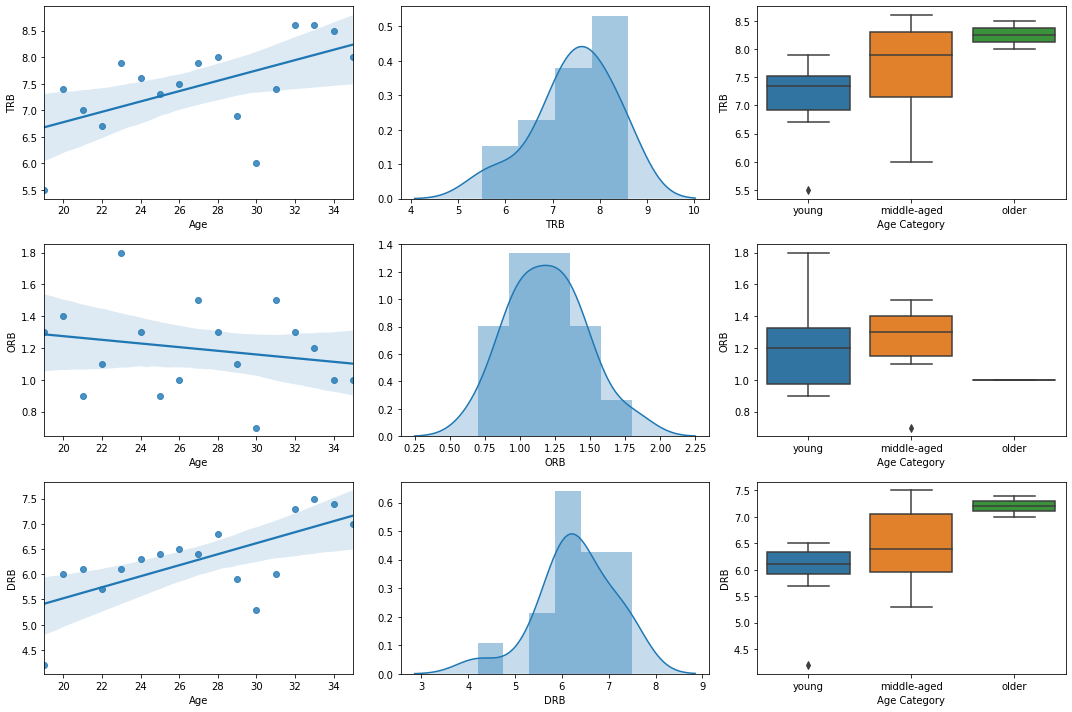

In [29]:
fig = plt.figure(1,(15,10))
i = 0
for rebound_col in rebound_cols:
    i += 1
    ax = plt.subplot(3,3,i)
    sns.regplot(x="Age",y=rebound_col,data=avgs_df)
    
    i += 1
    ax = plt.subplot(3,3,i)
    sns.distplot(avgs_df[rebound_col],kde_kws=dict(shade=True))
    
    i += 1
    ax = plt.subplot(3,3,i)
    sns.boxplot(x="Age Category",y=rebound_col,data=avgs_df)
    
    plt.tight_layout()
plt.show()

In [62]:
for rebound_col in rebound_cols:
    corr = np.corrcoef(avgs_df["Age"],avgs_df[rebound_col])[0,1]
    print(f"The correlation of {rebound_col} with Age is {round(corr,2)}")

The correlation of TRB with Age is 0.57
The correlation of ORB with Age is -0.21
The correlation of DRB with Age is 0.68


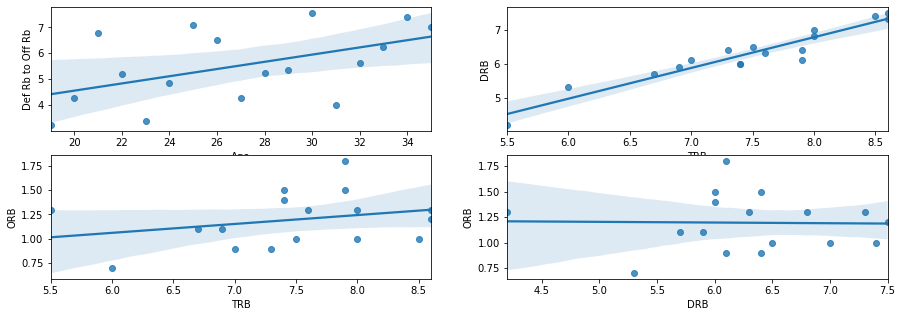

In [31]:
dr_to_ob = avgs_df["DRB"] / avgs_df["ORB"]
fig = plt.figure(1,(15,5))

ax = plt.subplot(2,2,1)
sns.regplot(x=avgs_df["Age"],y=dr_to_ob)
plt.ylabel("Def Rb to Off Rb")

ax = plt.subplot(2,2,2)
sns.regplot("TRB","DRB",data=avgs_df)


ax = plt.subplot(2,2,3)
sns.regplot("TRB","ORB",data=avgs_df)

ax = plt.subplot(2,2,4)
sns.regplot("DRB","ORB",data=avgs_df)

plt.show()

In [32]:
combos = itertools.combinations(rebound_cols,2)
combos = [(combo[0],combo[1]) for combo in combos]

In [61]:
for combo in combos:
    corr = np.corrcoef(avgs_df[combo[0]],avgs_df[combo[1]])[0,1]
    print(f"The correlation between {combo[0]} and {combo[1]} is {round(corr,2)}")

The correlation between TRB and ORB is 0.29
The correlation between TRB and DRB is 0.95
The correlation between ORB and DRB is -0.02


<h4>Insights</h4>
<ul>
    <li>Total rebounds and defensive rebounds have a very strong relationship, with a correlation of about 0.95</li>
    <li>Offensive rebounds and total rebounds have a weak positive correlation of 0.29</li>
    <li>Moreover offensive rebounds and defensive rebounds have no correlation, indicating one does not impact the other</li>
    <li>His defensive rebounds numbers have been increasing as he has gotten older while it seems offensive rebounds have been decreasing</li>
    <li>It he hovers around 0.75 to 1.5 offensive rebounds per game</li>
</ul>

In [34]:
print(avgs_df.columns)

Index(['Season', 'Age', 'Tm', 'Lg', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Age Category', 'Assist-To-Turnover-Ratio'],
      dtype='object')


<h3>Defensive Columns</h3>
<ul>
    <li>STL</li>
    <li>BLK</li>
    <li>PF</li>
    <li>STL-Per-PF</li>
    <li>BLK-Per-PF</li>
</ul>

In [37]:
avgs_df["STL-Per-PF"] = avgs_df["STL"] / avgs_df["PF"]
avgs_df["BLK-Per-PF"] = avgs_df["BLK"] / avgs_df["PF"]
def_cols = ["STL","BLK","PF","STL-Per-PF","BLK-Per-PF"]

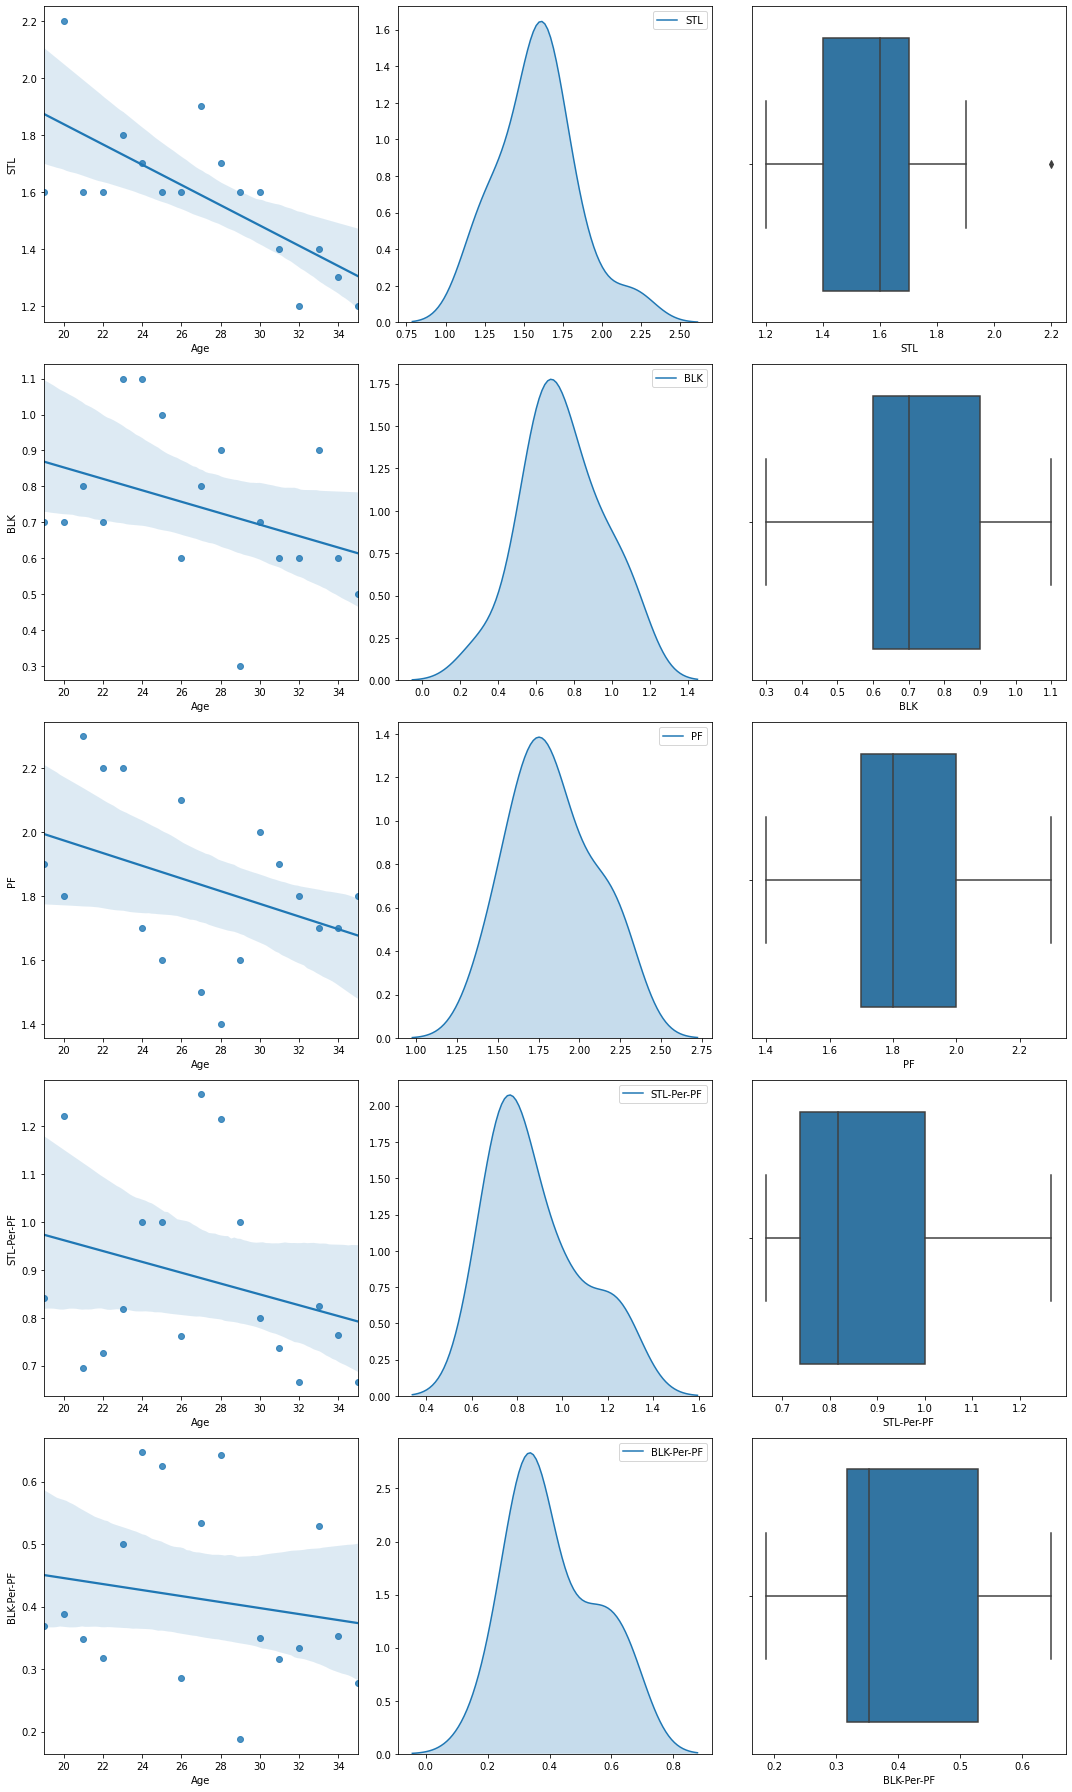

In [43]:
plt.figure(1,(15,5*len(def_cols)))
i = 0
for def_col in def_cols:
    i += 1
    ax = plt.subplot(len(def_cols),3,i)
    sns.regplot(x="Age",y=def_col,data=avgs_df)
    
    i += 1
    ax = plt.subplot(len(def_cols),3,i)
    sns.kdeplot(avgs_df[def_col],shade=True)
    
    i += 1
    ax = plt.subplot(len(def_cols),3,i)
    sns.boxplot(y=def_col,data=avgs_df,orient="h")
    
    plt.tight_layout()
plt.show()

In [44]:
for def_col in def_cols:
    idx = get_outlier_index(avgs_df,def_col)
    print(f"{def_col} has {len(avgs_df.iloc[idx])} outliers")

STL has 1 outliers
BLK has 0 outliers
PF has 0 outliers
STL-Per-PF has 0 outliers
BLK-Per-PF has 0 outliers


<h4>Insights</h4>
<ul>
    <li>Steals and blocks seem to follow a normalized distribution</li>
    <li>Personal fouls appears to have a slight bump around 2.25 fouls, but for the most part looks to be normal</li>
    <li>Blocks per personal foul and stealers per personal foul both are definitely bi-modal</li>
    <li> Steals has one outlier while the other defensive statistics do not have any outliers</li>
</ul>

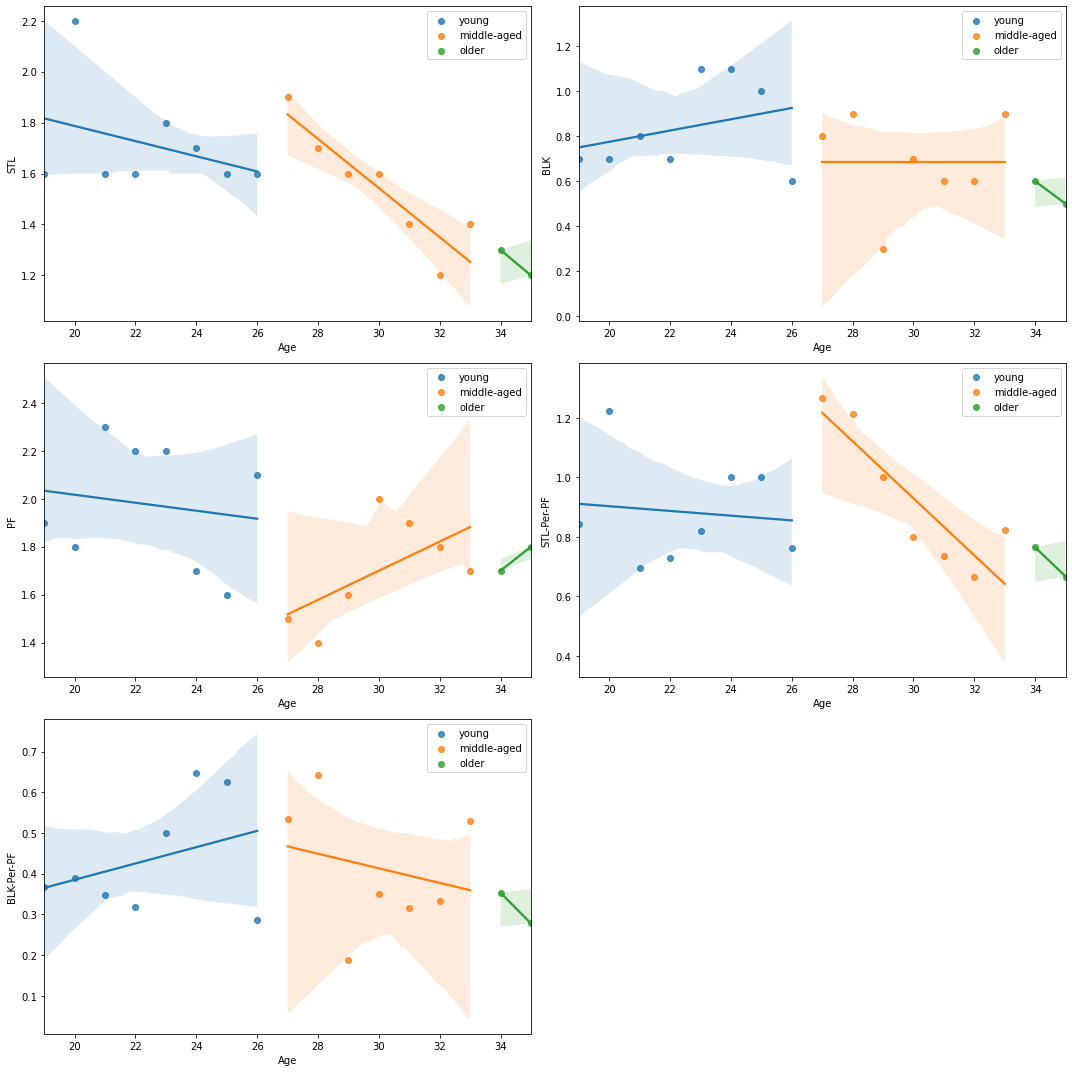

In [54]:
plt.figure(1,(15,15))
i = 0
for def_col in def_cols:
    i += 1
    ax = plt.subplot(3,2,i)
    for age_cat in avgs_df["Age Category"].unique():
        data = avgs_df[avgs_df["Age Category"] == age_cat]
        sns.regplot(x="Age",y=def_col,data=data,label=age_cat)
    ax.legend()
    plt.tight_layout()
plt.show()

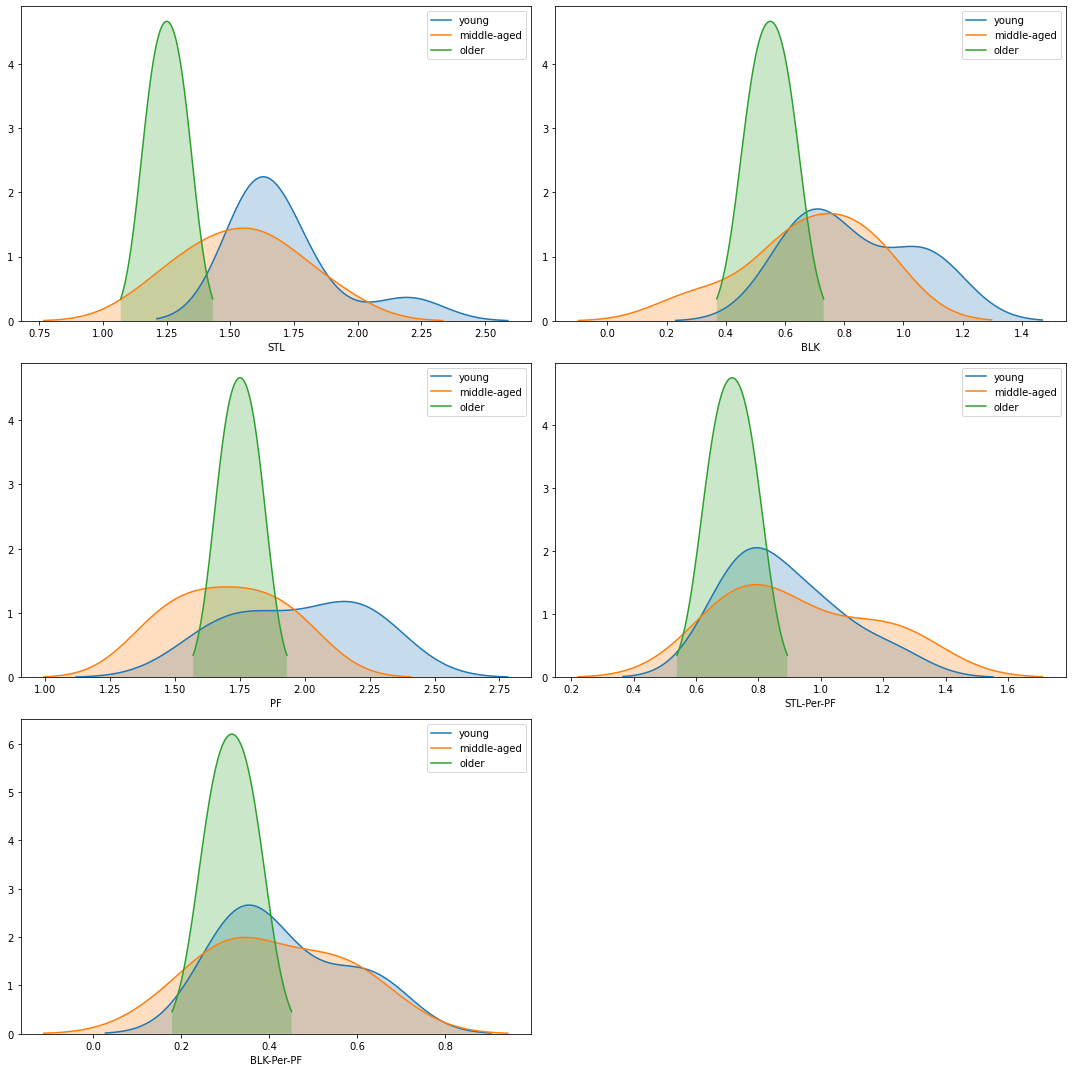

In [58]:
plt.figure(1,(15,15))
i = 0
for def_col in def_cols:
    i += 1
    ax = plt.subplot(3,2,i)
    for age_cat in avgs_df["Age Category"].unique():
        data = avgs_df[avgs_df["Age Category"] == age_cat]
        sns.kdeplot(data=data[def_col],label=age_cat, shade=True)
    ax.legend()
    ax.set_xlabel(def_col)
    plt.tight_layout()
plt.show()

In [68]:
for def_col in def_cols:
    corr = np.corrcoef(avgs_df['Age'],avgs_df[def_col])[0,1]
    print(f"The correlation of {def_col} with regards to Age is {round(corr,2)}")

The correlation of STL with regards to Age is -0.72
The correlation of BLK with regards to Age is -0.38
The correlation of PF with regards to Age is -0.39
The correlation of STL-Per-PF with regards to Age is -0.29
The correlation of BLK-Per-PF with regards to Age is -0.17


In [72]:
for def_col in def_cols:
    for age_cat in avgs_df["Age Category"].unique():
        if age_cat == "older":
            continue
        data = avgs_df[avgs_df["Age Category"] == age_cat]
        corr = np.corrcoef(data['Age'],data[def_col])[0,1]
        print(f"The correlation of {def_col} with regards to Age in the {age_cat} part of Lebron's career is {round(corr,2)}")
    print("\n")

The correlation of STL with regards to Age in the young part of Lebron's career is -0.35
The correlation of STL with regards to Age in the middle-aged part of Lebron's career is -0.91


The correlation of BLK with regards to Age in the young part of Lebron's career is 0.31
The correlation of BLK with regards to Age in the middle-aged part of Lebron's career is -0.0


The correlation of PF with regards to Age in the young part of Lebron's career is -0.16
The correlation of PF with regards to Age in the middle-aged part of Lebron's career is 0.61


The correlation of STL-Per-PF with regards to Age in the young part of Lebron's career is -0.11
The correlation of STL-Per-PF with regards to Age in the middle-aged part of Lebron's career is -0.88


The correlation of BLK-Per-PF with regards to Age in the young part of Lebron's career is 0.35
The correlation of BLK-Per-PF with regards to Age in the middle-aged part of Lebron's career is -0.24




<h4>Insights</h4>
<ul>
    <li>In all the defensive stats, Lebron's oldest part of his career has a strongest distribution with the lowest value</li>
    <li>Lebron's blocks, personal fouls, steals per personal foul, and blocks per personal foul during the younger and middle part of his career have similar distributions, although all the statistics besides steals per personal foul are bi-modal</li>
    <li>Overall, it seems only steals shows a strong correlation with age while the other categories demonstrate weak relationships</li>
    <li>However, when broken down by stages in Lebron's career, it seems the middle-part of Lebron's career shows some patterns</li>
    <li>The steals, personal fouls, and steals per personal foul all show strong or moderate correlations with regards to age during the middle part of his career</li>
</ul>
<i>Note: The correlations for the defensive statistics during the older part of Lebron's career were not calculated because there are only 2 data points, hence the correlation will always be either 1 or -1</i>